In [20]:
import numpy as np
from sklearn import *
import mltools as ml
import matplotlib.pyplot as plt
np.random.seed(0)

In [9]:
X = np.genfromtxt('./X_train.txt', delimiter=',')
Y = np.genfromtxt('./Y_train.txt', delimiter=',')
X_test = np.genfromtxt('./X_test.txt', delimiter=',')
X,Y = ml.shuffleData(X,Y)
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y,0.75)

n_estimators more means more accurate by computing takes longer as predictions are made with a larger amount of votes

In [120]:
n_estimators = range(100,1100,100)
n_estimators_VaErrors=[0]*len(n_estimators)
for each in range(11):
    for i in range(len(n_estimators)):
        random_forest = ensemble.RandomForestClassifier(n_estimators=n_estimators[i])
        random_forest.fit(Xtr,Ytr)
#         print("n_estimators: "+ str(n_estimators[i]))
        VaError=(1 - random_forest.score(Xva, Yva))
        n_estimators_VaErrors[i]= n_estimators_VaErrors[i] + VaError
#         print("validation error:" + str(VaError))
#         print("")

n_estimators: 100
Validation Error: 3.738146551724138

n_estimators: 200
Validation Error: 3.689655172413793

n_estimators: 300
Validation Error: 3.639547413793104

n_estimators: 400
Validation Error: 3.6174568965517233

n_estimators: 500
Validation Error: 3.655172413793103

n_estimators: 600
Validation Error: 3.616918103448276

n_estimators: 700
Validation Error: 3.6578663793103443

n_estimators: 800
Validation Error: 3.6476293103448274

n_estimators: 900
Validation Error: 3.6443965517241383

n_estimators: 1000
Validation Error: 3.637392241379311



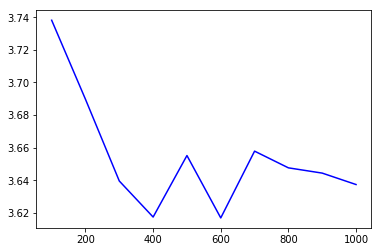

Minimum Validation Error: 3.616918103448276 at n_estimator of: 600


In [140]:
for i in range(len(n_estimators_VaErrors)):
    print ("n_estimators: " + str(n_estimators[i]))
    VaErrors[i] = VaErrors[i]/10
    print("Validation Error: " + str(n_estimators_VaErrors[i])+"\n")
plt.plot(n_estimators, n_estimators_VaErrors, color='blue')
plt.show()
print("Minimum Validation Error: " +  str(min(n_estimators_VaErrors)) + 
      " at n_estimator of: " + str(n_estimators[n_estimators_VaErrors.index(min(n_estimators_VaErrors))]))

In [149]:
# didn't apply n_estimators to reduce runtime
leaves = range(10,210,10)
VaErrors=[0]*len(leaves)
TrErrors=[0]*len(leaves)
for i in range(11):
    for leaf in range(len(leaves)):
        random_forest = ensemble.RandomForestClassifier(min_samples_leaf=leaves[leaf])
        random_forest.fit(Xtr,Ytr)
#         print("min_samples_leaf: "+ str(leaf))
        trError = 1 - random_forest.score(Xtr, Ytr)
        TrErrors[leaf]=TrErrors[leaf] + trError
#         print("training error:" + str(trError))
        VaError=(1 - random_forest.score(Xva, Yva))
        VaErrors[leaf] = VaErrors[leaf] + VaError
#         print("validation error:" + str(VaError))
#         print("")

min_samples_leaf: 10
Traing Errors: 0.1591162205855937
Validation Errors: 0.394073275862069

min_samples_leaf: 20
Traing Errors: 0.23411172983653666
Validation Errors: 0.38415948275862066

min_samples_leaf: 30
Traing Errors: 0.273199209628166
Validation Errors: 0.3912176724137931

min_samples_leaf: 40
Traing Errors: 0.2951859170109575
Validation Errors: 0.3983297413793103

min_samples_leaf: 50
Traing Errors: 0.3102389078498294
Validation Errors: 0.3895474137931035

min_samples_leaf: 60
Traing Errors: 0.32615412250763426
Validation Errors: 0.3838900862068966

min_samples_leaf: 70
Traing Errors: 0.3332674690138315
Validation Errors: 0.3900323275862069

min_samples_leaf: 80
Traing Errors: 0.33718340219148557
Validation Errors: 0.38890086206896557

min_samples_leaf: 90
Traing Errors: 0.34501526854679365
Validation Errors: 0.38723060344827587

min_samples_leaf: 100
Traing Errors: 0.3523621340039519
Validation Errors: 0.3892241379310345

min_samples_leaf: 110
Traing Errors: 0.361541225076342

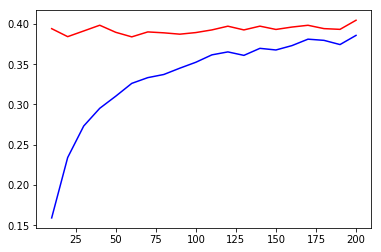

Minimum Validation Error: 0.3838900862068966 at n_estimator of: 60


In [150]:
for i in range(len(leaves)):
    print("min_samples_leaf: " + str(leaves[i]))
    TrErrors[i] = TrErrors[i]/10
    VaErrors[i] = VaErrors[i]/10
    print("Traing Errors: " + str(TrErrors[i]))
    print("Validation Errors: " + str(VaErrors[i]))
    print("")
plt.plot(leaves, TrErrors, color='blue')
plt.plot(leaves, VaErrors, color ='red')
plt.show()
print("Minimum Validation Error: " +  str(min(VaErrors)) + 
      " at n_estimator of: " + str(leaves[VaErrors.index(min(VaErrors))]))

# I get a about 60-80 after running multiple times but mostly 60